# Import libs

In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

sys.path.append('..')
from eFlow.ClusterMaster import *
from eFlow.DataFrameTypes import *
from eFlow.DataAnalysis import *
from eFlow.DataCleaner import *
from xgboost import XGBClassifier
import ipython_blocking
from pivottablejs import pivot_ui

In [2]:
%matplotlib notebook
%matplotlib inline

### Be sure to run the following

## Declare Worflow Variables

#### (This should be the only place you should have to declare anything)

In [3]:
dataset_path = "Datasets/titanic_train.csv"
target_col = "Survived"
parent_project_name = "Pre_processing"

# Import dataset

In [4]:
df = pd.read_csv(dataset_path)
display(df.shape)
df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Interaction tool for dataframes

### Explore the data

In [5]:
pivot_ui(df,
         outfile_path='Piviot_Table_JS.html')

## Remove Un-Wanted Columns

### Do not remove nans yet, let the datacleaner do it's job

In [6]:
df.drop(columns=["Name",
                 "Ticket",
                 "PassengerId"],
        inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Basic Feature manipulation

### Change cabin column to have the level on the ship

In [7]:
df["Cabin"] = df["Cabin"].str.replace(r'\d+', '').str[0]

## Change Feature Data types

### Look at data types

In [8]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

### Make given data type changes

In [9]:
df["Survived"] = df["Survived"].astype(bool)

### Final look at data types

In [10]:
df.dtypes

Survived       bool
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

## Set up DataFrameTypes

In [11]:
df_features = DataFrameTypes(df,
                             target_col="Sex")

Categorical Features: {'Cabin', 'Embarked', 'Sex'}

Bool Features: {'Survived'}

Possible One hot encoded feature names: {'Cabin': ['Cabin_G', 'Cabin_F', 'Cabin_B', 'Cabin_T', 'Cabin_C', 'Cabin_A', 'Cabin_E', 'Cabin_D'], 'Embarked': ['Embarked_Q', 'Embarked_C', 'Embarked_S'], 'Sex': ['Sex_male', 'Sex_female']}

------------------------------------------------------------------------------------------
Numerical Features: {'Parch', 'Pclass', 'Age', 'SibSp', 'Fare'}

Integer Features: {'SibSp', 'Pclass', 'Parch'}

Float Features: {'Fare', 'Age'}

Target Feature: Sex



## Skim through Value Counts

In [12]:
for col in df.columns:
    if col not in df_features.get_float_features() or len(np.unique(df[col].dropna().values)) <= 25:
        display(df[col].value_counts())
        print("***" * 4 + "\n\n")

False    549
True     342
Name: Survived, dtype: int64

************




3    491
1    216
2    184
Name: Pclass, dtype: int64

************




male      577
female    314
Name: Sex, dtype: int64

************




0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

************




0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

************




C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

************




S    644
C    168
Q     77
Name: Embarked, dtype: int64

************




### Perform quick analysis

Survived       bool
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object




Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2




********************************************************************************




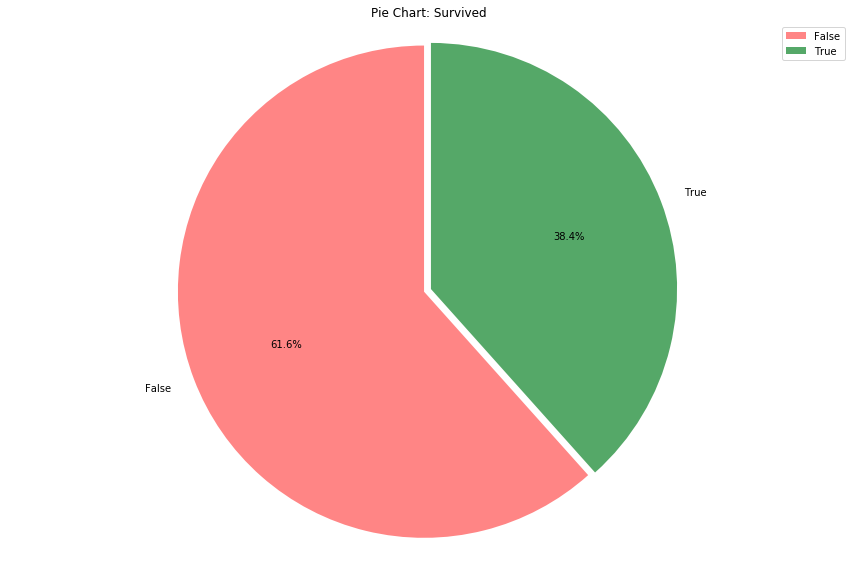

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts
0,False,549
1,True,342






--------------------------------------------------------------------------------




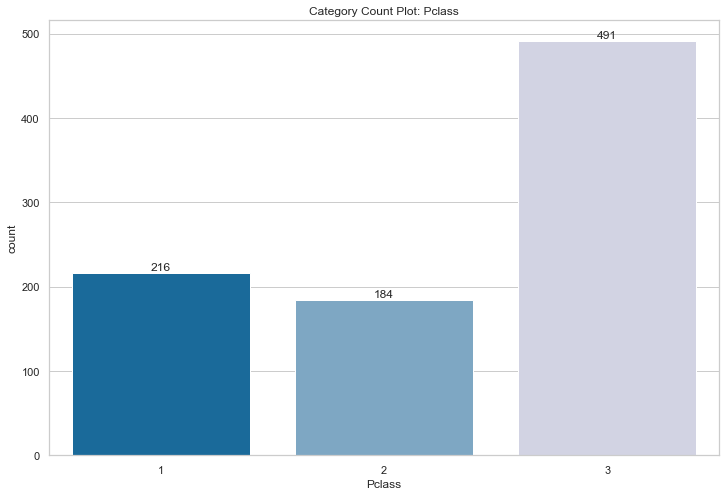

,Unique Values,Counts
0,3,491
1,1,216
2,2,184






--------------------------------------------------------------------------------




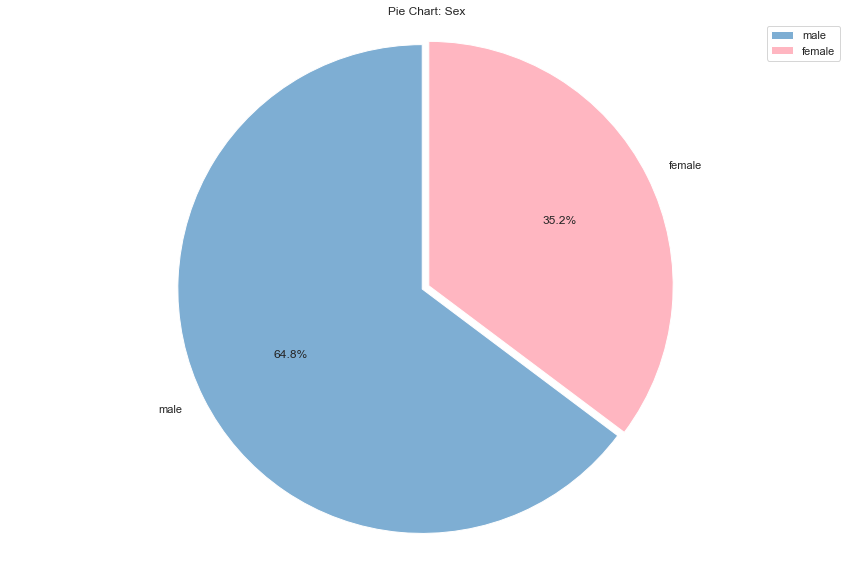

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts
0,male,577
1,female,314






--------------------------------------------------------------------------------




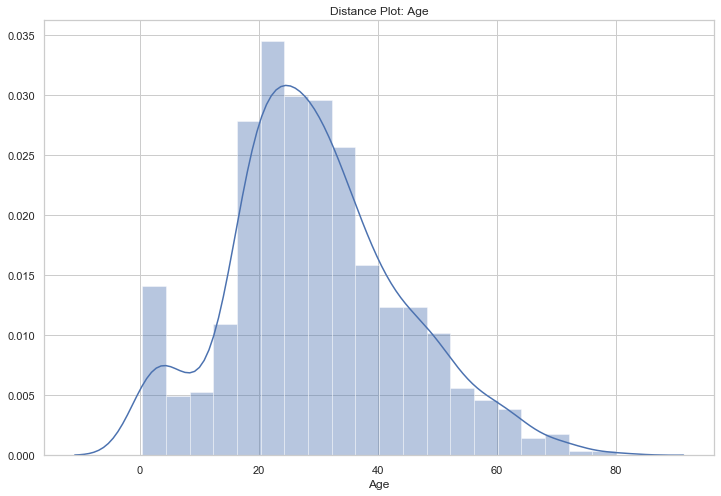

,Age,var
count,714.000000,211.019125
mean,29.699118,211.019125
std,14.526497,211.019125
min,0.420000,211.019125
25%,20.125000,211.019125
50%,28.000000,211.019125
75%,38.000000,211.019125
max,80.000000,211.019125






--------------------------------------------------------------------------------




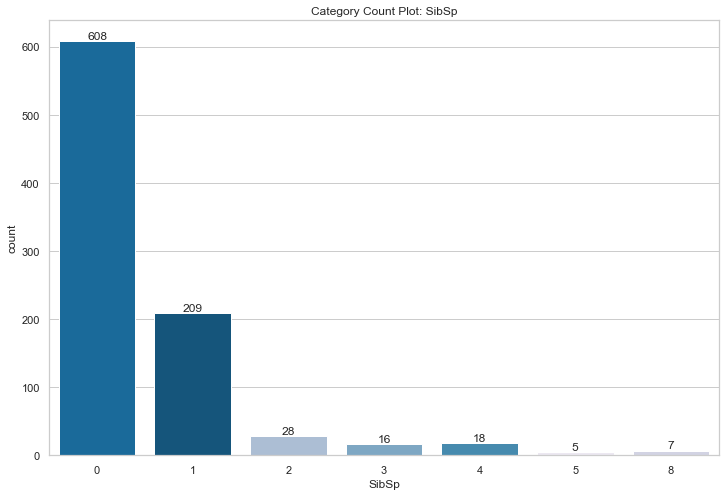

,Unique Values,Counts
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5






--------------------------------------------------------------------------------




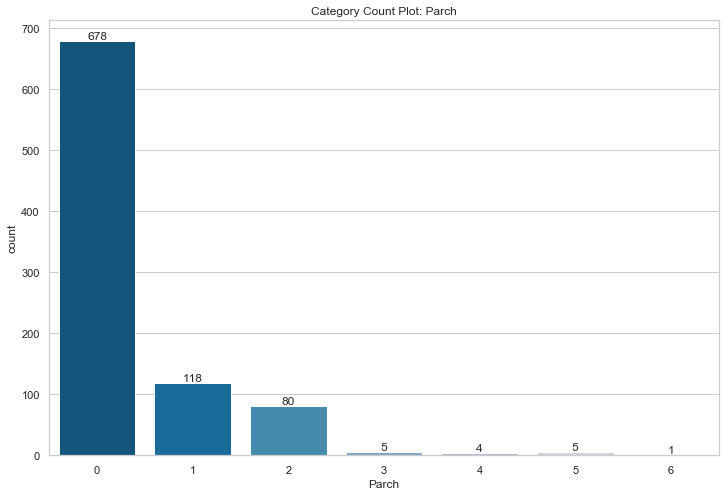

,Unique Values,Counts
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1






--------------------------------------------------------------------------------




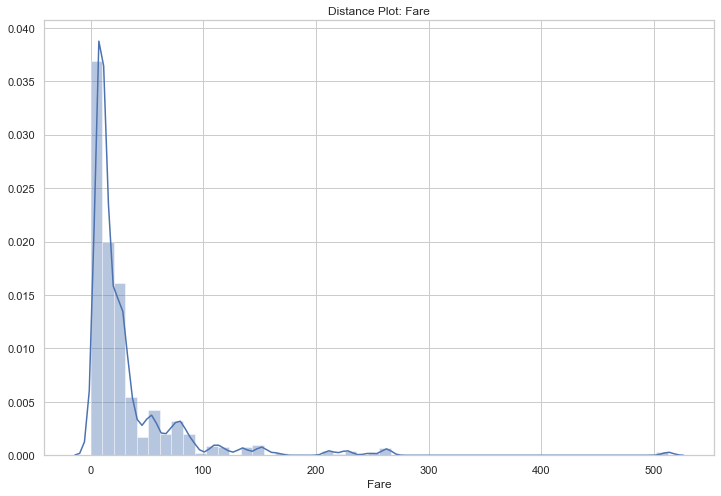

,Fare,var
count,891.000000,2469.436846
mean,32.204208,2469.436846
std,49.693429,2469.436846
min,0.000000,2469.436846
25%,7.910400,2469.436846
50%,14.454200,2469.436846
75%,31.000000,2469.436846
max,512.329200,2469.436846






--------------------------------------------------------------------------------




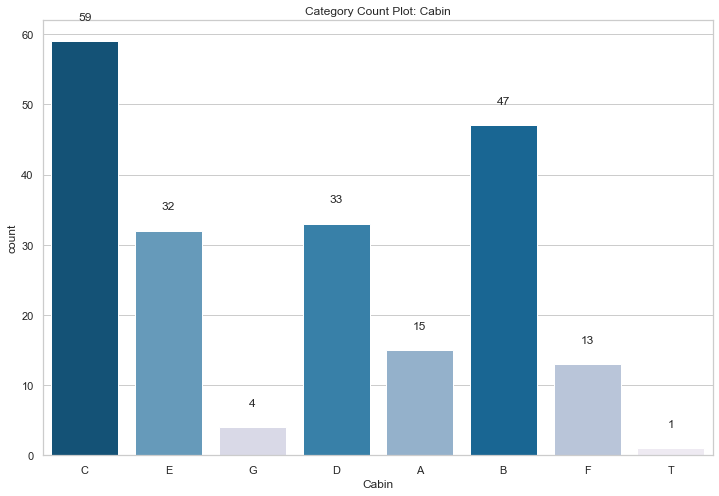

,Unique Values,Counts
0,C,59
1,B,47
2,D,33
3,E,32
4,A,15
5,F,13
6,G,4
7,T,1






--------------------------------------------------------------------------------




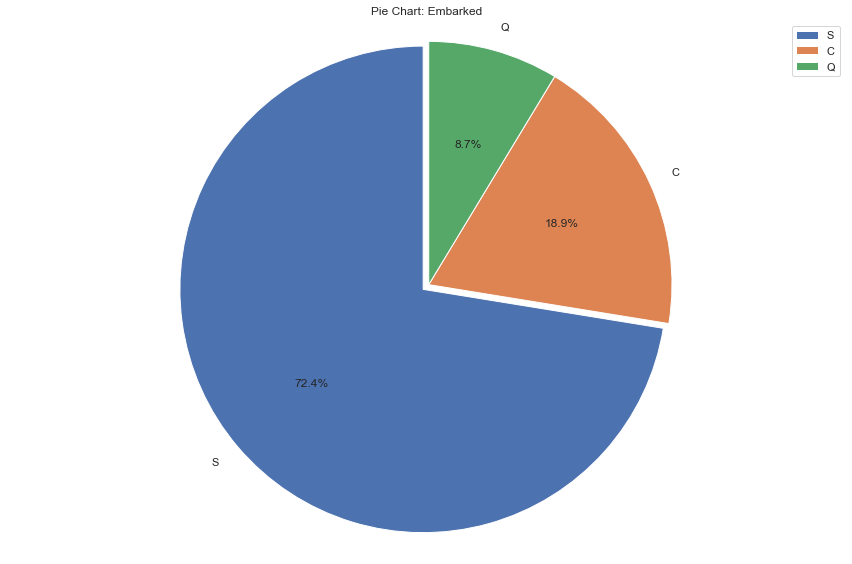

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts
0,S,644
1,C,168
2,Q,77






--------------------------------------------------------------------------------




In [13]:
analysis_obj = DataAnalysis(df,
                            df_features,
                            project_name=parent_project_name + "/" + "General Analysis")

### ERIC: WEEKEND PROJECT FINISH DATACLEANER!
6-7 HOURS

In [14]:
parent_project_name

'Pre_processing'

/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/Master_Universal_Data_Analytics/Testing/Production Data/Pre_processing/Data Cleaning/
Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


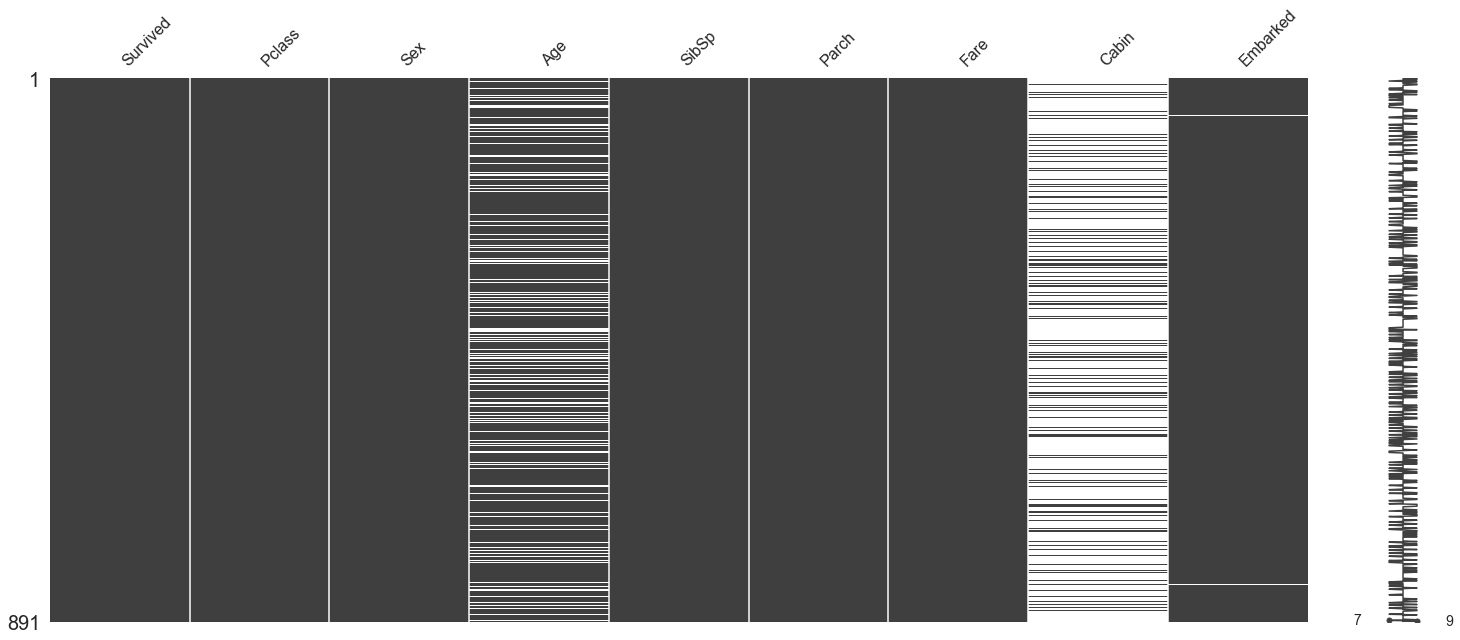

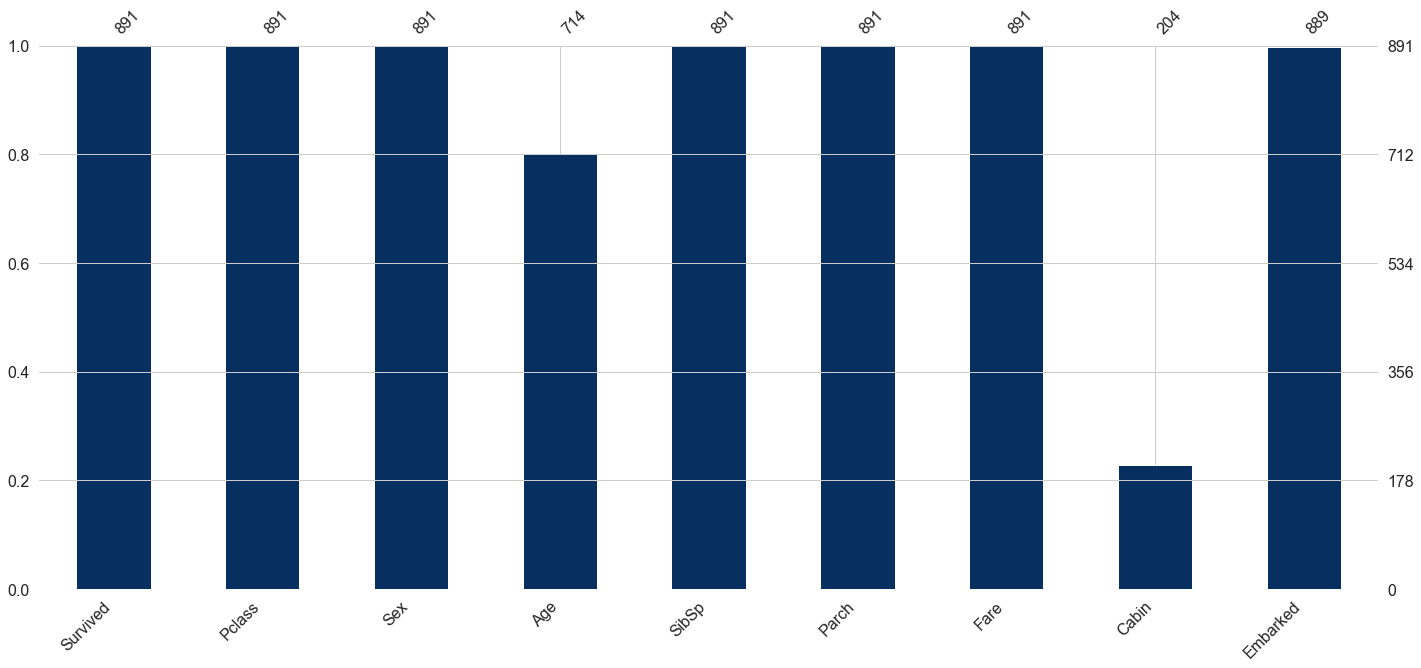

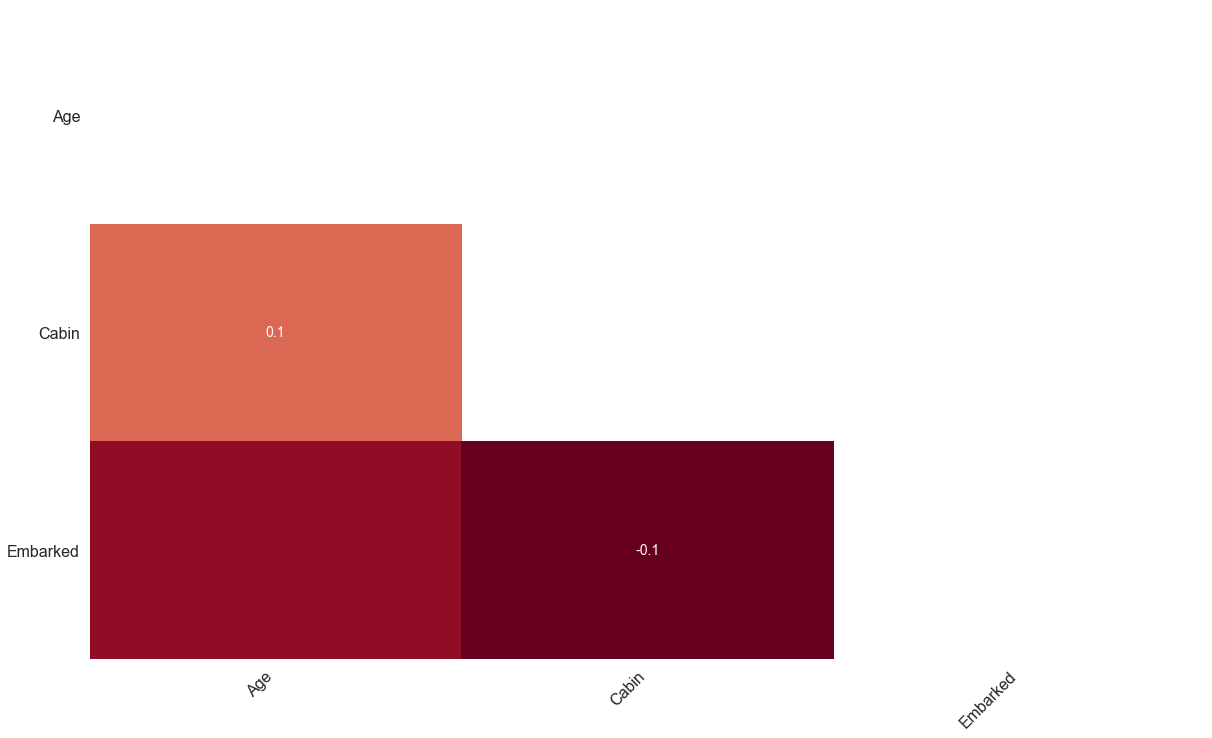

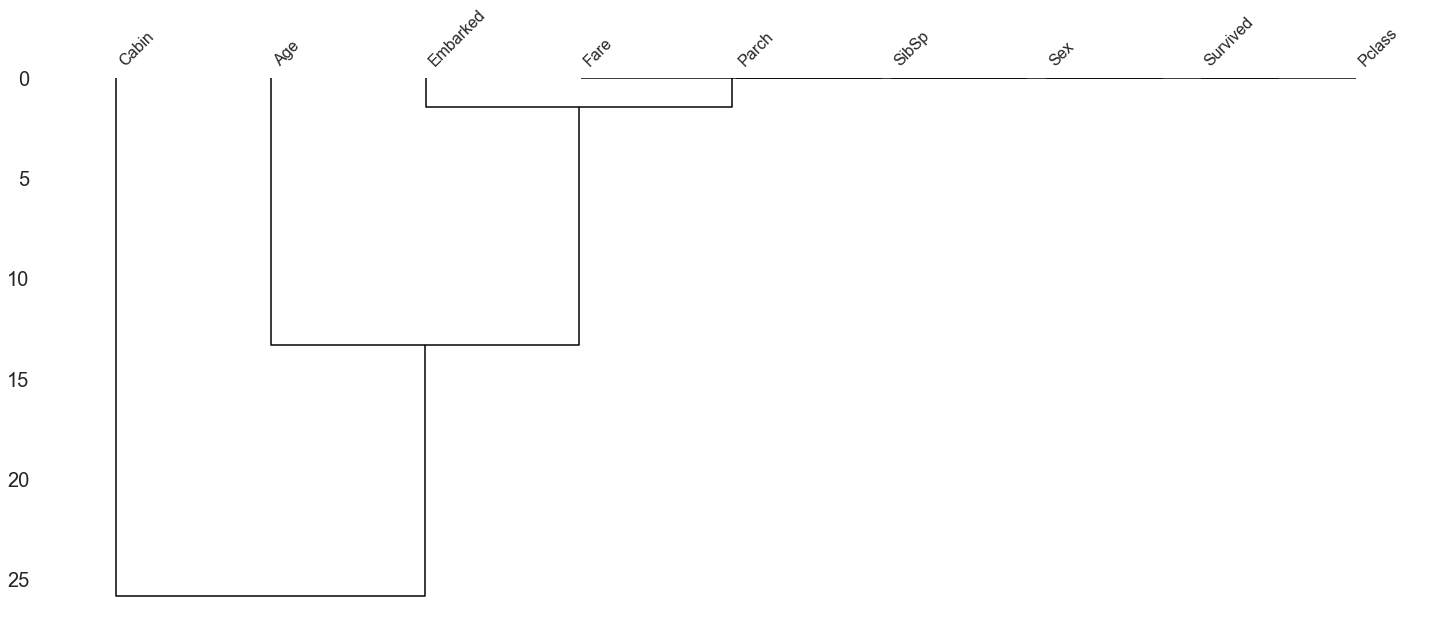

In [15]:
data_cleaner = DataCleaner(df,
                           project_name=parent_project_name + "/" + "Data Cleaning",
                           missing_data_visuals=True)

In [16]:
a = "/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/Master_Universal_Data_Analytics/Testing/Production Data/Pre_processing/Data Cleaning/"

a[0:a.find("Production Data")] + "Production Data"

'/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/Master_Universal_Data_Analytics/Testing/Production Data'

In [17]:
submit_button = data_cleaner.data_cleaning_widget(df,
                                                  df_features)

interactive(children=(Select(description='Features', layout=Layout(width='50%'), options=('Age', 'Cabin', 'Emb…

Button(description='Create JSON File from options', layout=Layout(bottom='5px', left='100px', width='40%'), st…

In [ ]:
if True:
    %block submit_button

In [19]:
df_features = DataFrameTypes(df,
                             target_col="Survived")

Categorical Features: {'Cabin', 'Embarked', 'Sex'}

Bool Features: {'Survived'}

Possible One hot encoded feature names: {'Cabin': ['Cabin_G', 'Cabin_F', 'Cabin_B', 'Cabin_T', 'Cabin_C', 'Cabin_A', 'Cabin_E', 'Cabin_D'], 'Embarked': ['Embarked_Q', 'Embarked_C', 'Embarked_S'], 'Sex': ['Sex_male', 'Sex_female']}

------------------------------------------------------------------------------------------
Numerical Features: {'Parch', 'Pclass', 'Age', 'SibSp', 'Fare'}

Integer Features: {'SibSp', 'Pclass', 'Parch'}

Float Features: {'Fare', 'Age'}

Target Feature: Survived

